In [2]:
import os
import cv2
import matplotlib.pyplot as plt

root_path = os.getcwd()
background_path = root_path+r"/test_imgs/background.jpg"
foreground_path = root_path+r"/test_imgs/foreground.jpg"
mask_path = root_path+r"/test_imgs/mask.png"

cv_background = cv2.imread(background_path)
cv_foreground = cv2.imread(foreground_path)
cv_mask = cv2.imread(mask_path)


# print(cv_foreground)
# print(type(cv_foreground) == type(None))
# if (type(cv_background) == type(None) or type(cv_foreground) == type(None) or type(cv_mask) == type(None)):
if (cv_background is None or cv_foreground is None or cv_mask is None):
    print('One of the files is None')
else:
    print('Passed Cv Test!')

Passed Cv Test!


(1536, 2048, 3)


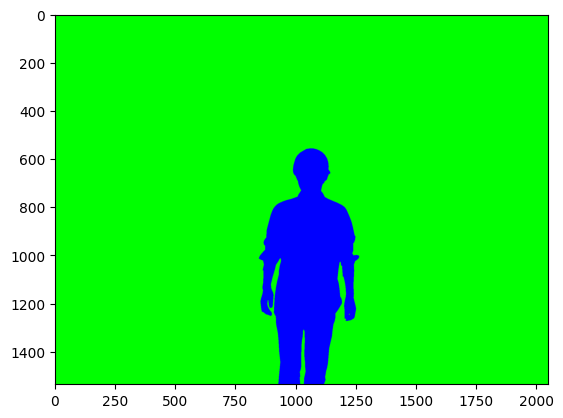

In [3]:
print(cv_mask.shape)
plt.imshow(cv_mask)

In [17]:
print(type(cv_mask))

<class 'numpy.ndarray'>


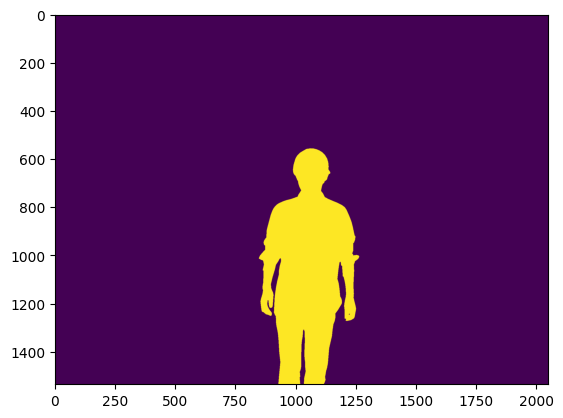

In [4]:
import matplotlib.pyplot as plt

#BGR
read_channel = cv_mask[:,:,2] #showing the img by yellow 
plt.imshow(read_channel)

(1536, 2048)


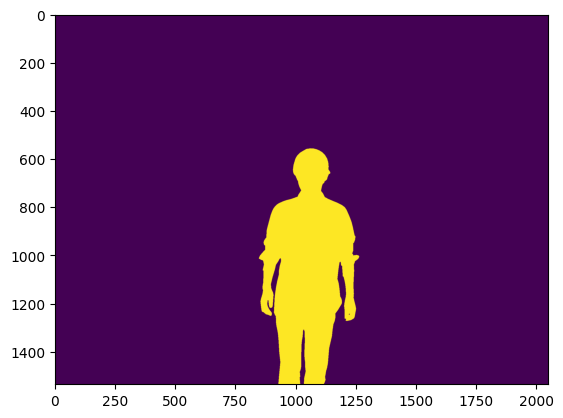

In [5]:
import matplotlib.pyplot as plt

#BGR
red_channel = cv_mask[:,:,2] #showing the img by yellow 
print(red_channel.shape)
plt.imshow(red_channel)

In [6]:
red_channel.shape

(1536, 2048)

In [7]:
height, width = red_channel.shape
print(height, width)

1536 2048


In [8]:
count = 0
for row in range(height):
    for col in range(width):
        # print(red_channel[row][col])
        if (red_channel[row,col] == 255):
            count += 1
print(count)


248518


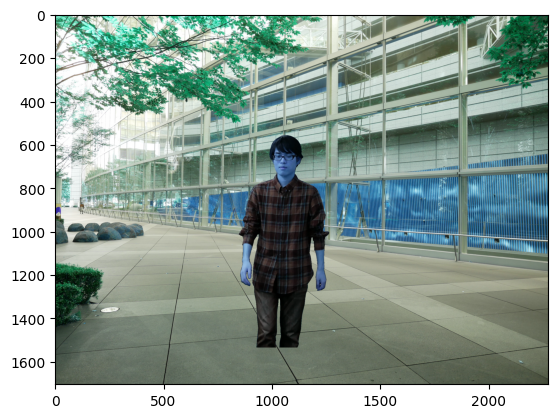

In [9]:
cv_background_copy = cv_background.copy()
for row in range(height):
    for col in range(width):
        if red_channel[row][col] == 255:
            cv_background_copy[row][col] = cv_foreground[row][col]

plt.imshow(cv_background_copy)



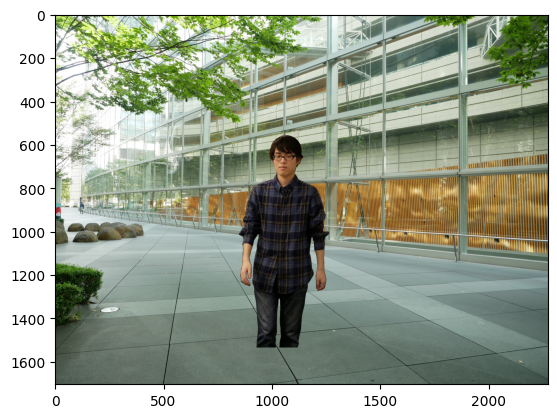

In [10]:
rgb_img = cv2.cvtColor(cv_background_copy, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

## Solve with PIL

In [13]:
import os
from PIL import Image
root_path = os.getcwd()
foreground_path = root_path+r"/test_imgs/foreground.jpg"
background_path = root_path+r"/test_imgs/background.jpg"
mask_path = root_path+r"/test_imgs/mask.png"

pil_foreground = Image.open(foreground_path)
pil_background = Image.open(background_path)
pil_mask = Image.open(mask_path)

if pil_foreground == None or pil_background == None or pil_mask == None:
    print("One of the files is None")
else:
    print("All PIL Img Processing Passed!")

All PIL Img Processing Passed!


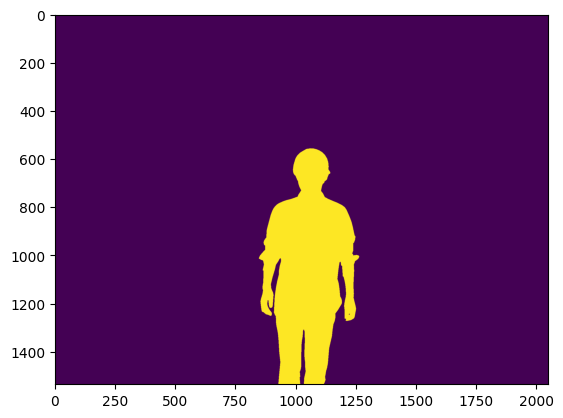

In [19]:
#Read red channel
#RGB [0,1,2]
import matplotlib.pyplot as plt
import numpy as np

# print(type(pil_mask)) <class 'PIL.PngImagePlugin.PngImageFile'>

#converting to numpy
pil_mask_arr = np.array(pil_mask)

#reading red channel
red_channel = pil_mask_arr[:,:,0]
plt.imshow(red_channel)


In [21]:
#pass by reference
foreground_pixels = pil_foreground.load()
background_pixels = pil_background.load()
mask_pixels = pil_mask.load()

In [26]:
width, height = pil_mask.size #2048 1536
print(width, height)

2048 1536


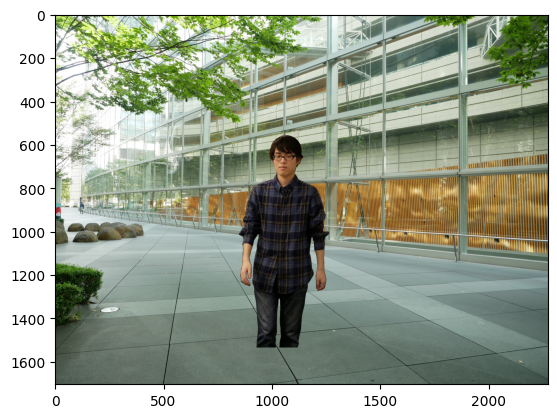

In [29]:
for i in range(pil_mask.size[0]):
    for j in range(pil_mask.size[1]):
        if mask_pixels[i,j] == (255,0,0):
            background_pixels[i,j] = foreground_pixels[i,j]

np_img = np.array(pil_background)       
plt.imshow(pil_background)